# Chemical Potentials: December 29th, 2021
1. Fixed an issue in the 

In [1]:
from classes import *
from chem_pot import *
from numerical import *

## Initializing Model Parameters in EOS Object, Baryons, Leptons, Mesons, and Independent Variables
1. We have the class declaration for all the above objects stored in the classes file. Each class object stores relevant information. So for example, we can declare a Baryon object called "Proton" which holds the mass, charge, isospin, number density, among other things. 
    - In the future, this should make the extension to additional particles better. 
2. In general, for each class, we declare two sets of objects: one symbolic class and one numeric class. The symbolic class will store symbolic symbols. Using this, we can symbolically arrive at relevant quantities like the partial derivative of the chemical potentials. After this, we can then substitute in numerical values to perform calculations. 

#### Equation of State

In [5]:
# initializing numerical eos object 
gm3 = eos(g_sigma_N = 8.784820, g_omega_N = 8.720086, g_rho_N = 8.544795, g_phi_N = 0.0, b = 0.008628, c = -0.002433,\
             g_sigma_H = 5.408849, g_omega_H = 5.813391, g_rho_H = 0.0, g_phi_H = -4.110688)

# initializing symbolic eos object 

# declaring symbols (in SymPy)
g_sigma_N, g_omega_N, g_rho_N, g_phi_N, b, c = sym.symbols('g_sigma_N, g_omega_N, g_rho_N, g_phi_N, b, c')
g_sigma_H, g_omega_H, g_rho_H, g_phi_H = sym.symbols('g_sigma_Lambda, g_omega_Lamda, g_rho_Lambda, g_phi_Lambda')

# initializing symbolic eos object
gm3_sym = eos(g_sigma_N, g_omega_N, g_rho_N, g_phi_N, b, c,\
                    g_sigma_H, g_omega_H, g_rho_H, g_phi_H)

### Independent Variables

In [6]:
# initializing independent variables
nb = independent_var(sym.symbols('n_B'), sym.Function('n_B'))
xe = independent_var(sym.symbols('x_e'), sym.Function('x_e'), sym.symbols('mu tilde_x_e'))
xl = independent_var(sym.symbols('x_Lambda'), sym.Function('x_Lambda'), sym.symbols('mu tilde_x_Lambda'))

### Leptons and Baryons

In [8]:
# electron
electron_sym = lepton(sym.symbols('m_e'), -1, sym.symbols('n_e'), sym.symbols('x_e'), 'Independent',\
                      sym.symbols('k_F_e'), sym.symbols('\mu_e'))
electron_num = lepton(0.510, -1)

# lambda hyperon
lambda_sym = baryon(sym.symbols('m_Lambda'), 0.0, 0.0, 'Hyperon', 'Independent', sym.symbols('g_sigma_H'), sym.symbols('m_Lambda^*'),\
                    sym.symbols('n_Lambda'), sym.symbols('x_Lambda'), sym.symbols('k_F_Lambda'),\
                    sym.symbols('E^*_F_Lambda'), sym.symbols('mu_Lambda'))
lambda_num = baryon(1116.0, 0, 0, 'Hyperon', 'Independent', gm3.g_sigma_H)

# proton 
proton_sym = baryon(sym.symbols('m_p'), 1/2, 1, 'Nucleon', 'Dependent', sym.symbols('g_sigma_N'), sym.symbols('m_p^*'),\
                    sym.symbols('n_p'), sym.symbols('x_p'), sym.symbols('k_F_p'),\
                    sym.symbols('E^*_F_p'), sym.symbols('mu_p'))
proton_num = baryon(939.0, 1/2, 1, 'Nucleon', 'Dependent', gm3.g_sigma_N)

# neutron 
neutron_sym = baryon(sym.symbols('m_n'), -1/2, 0, 'Nucleon', 'Dependent', sym.symbols('g_sigma_N'), sym.symbols('m_n^*'),\
                    sym.symbols('n_n'), sym.symbols('x_n'), sym.symbols('k_F_n'),\
                    sym.symbols('E^*_F_n'), sym.symbols('mu_n'))
neutron_num = baryon(939.0, -1/2, 0, 'Nucleon', 'Dependent', gm3.g_sigma_N)

#### Re-writing the dependent variables in terms of independent variables

In [9]:
# re-write proton and neutron number densities and fractions in terms of independent ones
proton_sym.num_density = nb.var*(xe.var)
proton_sym.frac = xe.var

neutron_sym.num_density = nb.var*(1 - xe.var - xl.var)
neutron_sym.frac = 1 - xe.var - xl.var

### Mesons

In [10]:
# declaring the symbolic meson objects
sigma_sym = meson(sym.symbols('m_sigma'), sym.symbols('sigma'))
omega_sym = meson(sym.symbols('m_omega'), sym.symbols('omega'))
rho_sym = meson(sym.symbols('m_rho'), sym.symbols('rho'))
phi_sym = meson(sym.symbols('m_phi'), sym.symbols('phi'))

# declaring the numeric meson objects
sigma_num = meson(550.0)
omega_num = meson(783.0)
rho_num = meson(770.0)
phi_num = meson(1020.0)

### Establishing Helpful Lists
1. Below we have two lists: a list of the independent variables and a list of the baryons. We sum over these in the code below.

In [11]:
# Making a list of the independent variables
independent_variables = [nb, xe, xl]

# List of symbolic and numeric baryon objects
baryon_list = [proton_sym, neutron_sym, lambda_sym]
baryon_num_list = [proton_num, neutron_num, lambda_num]

# List of symbolic and numeric lepton objects (just electrons for now)
lepton_list = [electron_sym]
lepton_num_list = [electron_num]

# List of symbolic and numeric meson objects
meson_list = [sigma_sym, omega_sym, rho_sym, phi_sym]
meson_num_list = [sigma_num, omega_num, rho_num, phi_num]

## Lepton/Electron Chemical Potential Derivative
We can immediately write down the electron chemical potential which we can take derivatives of quite easily.
$$
    \mu_e = \sqrt{k_{F_e}^2 + m_e^2} \qquad k_{F_e} = (3\pi^2 n_e)^{1/3} \qquad 
       n_e = n_B x_e
$$

In [14]:
def chem_pot_electron(x_j):
    # calculates symbolic derivative of electron chemical potential wrt independent variable x_j
    # note: suppose we want to pass ind_var as arg. We need to pass ind_var.var which stores the symbol representation
    # for the ind_var object! Ex. can't pass nb, but instead must pass nb.var 
    
    mu_e = sym.sqrt(electron_sym.kf**2 + electron_sym.mass**2)
    mu_e = mu_e.subs(electron_sym.kf, (3*Pi**2*sym.symbols('n_B')*electron_sym.frac)**(sym.S(1)/3))
    return mu_e.diff(x_j)

Example: We can calculate
$$
    \frac{\partial \mu_e}{\partial n_B} = \frac{\partial}{\partial n_B}\sqrt{(3\pi^2 n_B x_e)^{2/3}+m_e^2}
$$
by calling chem_pot_electron and we get the following symbolic output

In [15]:
chem_pot_electron(nb.var)

3**(2/3)*(n_B*pi**2*x_e)**(2/3)/(3*n_B*sqrt(m_e**2 + 3**(2/3)*(n_B*pi**2*x_e)**(2/3)))

Advantage of this method: we can perform calculus techniques a little easier and then just substitute in numerical values in afterwards without needing to calculate derivatives numerically.

# Working towards Baryon Chemical Potential Partial Derivatives
Ultimately, we want to write down a function that takes a baryon $i$ and an independent variable $x_j$ and returns the partial derivative of the chemical potential of baryon $i$ with respect to $x_j$. That is,
$$
    \frac{\partial \mu_i}{\partial x_j} = \frac{\partial \mu_i'}{\partial x_j} + \frac{\partial \mu_i^R}{\partial x_j}
$$
where 
$$
    \frac{\partial \mu_i'}{\partial x_j} = \frac{\partial }{\partial x_j}\sqrt{k_{F_i}^2 + {m_i^*}^2}
    \qquad 
    \frac{\partial \mu_i^R}{\partial x_j} = \sum_k g_{\text{Meson}}\frac{\partial }{\partial x_j}\text{Meson}_j
$$
This task is broken down as follows:
- Calculate $\partial \mu_i'/\partial x_j$ and $\partial \mu_i^R/\partial x_j$
    - For the second task, we need to calculate partial derivatives of meson fields and then multiply by relevant coupling constants 
    - For the first task, then need to find the partial derivative of the effective energy. This then amounts to finding the partial derivative of the sigma fields. 
    
With this in mind, let us start from the bottom and work ourselves back up.

## Working Towards $\partial \mu^R_i/\partial x_j$

### Calculating Partial Derivatives of Meson Fields with respect to independent variable $x_j$
1. Goal here: write a function that takes as input independent variable $x_j$ and returns $\partial \omega_0/\partial x_j$ and more.

### $\partial \omega/\partial x_j$
$$
    m_\omega^2 \omega_0 = \sum_i g_{\omega i}n_i \qquad \implies \qquad 
    \frac{\partial\omega_0}{\partial x_j} = \frac{1}{m_\omega^2}
    \sum_i g_{\omega i}\frac{\partial n_i}{\partial x_j} \qquad n_i = n_B x_i
$$

In [29]:
def partial_omega(x_j):
    # returns domega/dxj
    omega_sym.field = 0
    
    # equation of motion 
    for i in range(len(baryon_list)):
        if(baryon_list[i].kind == 'Nucleon'):
            omega_sym.field = gm3_sym.g_omega_N*nb.var*baryon_list[i].frac + omega_sym.field
        elif(baryon_list[i].kind == 'Hyperon'):
            omega_sym.field = gm3_sym.g_omega_H*nb.var*baryon_list[i].frac + omega_sym.field
        
    omega_sym.field = 1/omega_sym.mass**2*omega_sym.field 

    # calculate partial derivative 
    return sym.simplify(omega_sym.field.diff(x_j))

In [30]:
def partial_rho(x_j):
    # returns drho/dxj
    rho_sym.field = 0 
    
    # equation of motion
    # in the future would be good to call the equation of motion directly here... from Lagrangian
    for i in range(len(baryon_list)):
        if(baryon_list[i].kind == 'Nucleon'):
            rho_sym.field = gm3_sym.g_rho_N*baryon_list[i].frac*nb.var*baryon_list[i].isospin + rho_sym.field
        elif(baryon_list[i].kind == 'Hyperon'):
            rho_sym.field = gm3_sym.g_rho_H*baryon_list[i].frac*nb.var*baryon_list[i].isospin + rho_sym.field
    
    rho_sym.field = 1/rho_sym.mass**2*rho_sym.field
    
    # calculate partial derivative
    return sym.simplify(rho_sym.field.diff(x_j))

In [31]:
def partial_phi(x_j):
    # returns dmeson/dxj
    phi_sym.field = 0
    
    # equation of motion 
    for i in range(len(baryon_list)):
        if(baryon_list[i].kind == 'Nucleon'):
            phi_sym.field = gm3_sym.g_phi_N*baryon_list[i].frac*nb.var + phi_sym.field
        elif(baryon_list[i].kind == 'Hyperon'):
            phi_sym.field = gm3_sym.g_phi_H*baryon_list[i].frac*nb.var + phi_sym.field
        
    phi_sym.field = 1/phi_sym.mass**2*phi_sym.field 
    
    # calculate partial derivative 
    return sym.simplify(phi_sym.field.diff(x_j))

### Arriving at expression for Partial Derivative of $\mu_i^R$
Where 
$$
    \mu_i^R = g_{\omega i}\omega + g_{\phi i}\phi + I_{3B}g_{\rho i}\rho
$$

In [34]:
def partial_mu_R(baryon_sym, x_j):
    # returns dmu_i^R/dx_j
    
    if(baryon_sym.kind == 'Nucleon'):
        return gm3_sym.g_omega_N*partial_omega(x_j) + gm3_sym.g_phi_N*partial_phi(x_j)\
            + baryon_sym.isospin*gm3_sym.g_rho_N*partial_rho(x_j)
    
    elif(baryon_sym.kind == 'Hyperon'):
        return gm3_sym.g_omega_H*partial_omega(x_j) + gm3_sym.g_phi_H*partial_omega(x_j)\
            + baryon_sym.isospin*gm3_sym.g_rho_H*partial_rho(x_j)

## Working towards $\partial \mu_i'/\partial x_j$
We have the following expression for 
$$
    \frac{\partial \mu_i'}{\partial x_j} = \frac{\partial }{\partial x_j}\sqrt{k_{F_i}^2 + {m_i^*}^2}
    = \frac{1}{2}\frac{k_{F_i}\dfrac{\partial k_{F_i}}{\partial x_j} - g_{\sigma i}m_i^* \dfrac{\partial\sigma}{\partial x_j}}{\sqrt{k_{F_i}^2 + {m_i^*}^2}}
$$
which depends on 
$$
    \frac{\partial k_{F_i}}{\partial x_j} \qquad \frac{\partial\sigma}{\partial x_j}
$$

#### Calculating $\frac{\partial k_{F_i}}{\partial x_j}$ with respect to independent variables

In [20]:
def partial_fermi(baryon_sym, x_j):
    # assumes baryon number density has already been re-written in terms of independent variables at the beginning
    kFi = (3*Pi**2*baryon_sym.num_density)**(sym.S(1)/3)
    return kFi.diff(x_j)

### Calculate $\partial \sigma/\partial x_j$
From the notes, we have
$$
    \frac{\partial \sigma}{\partial x_j} = \frac{\sum_i g_{\sigma i} \beta_i \dfrac{\partial k_{F_i}}{\partial x_j}}{m_\sigma^2 + \dfrac{\partial^2 U}{\partial \sigma^2} - \sum_i g_{\sigma i}\alpha_i}
$$
where
$$
    \alpha_i = \left[\frac{3}{2}\frac{g_{\sigma i}{m_i^*}^2}{\pi^2}
        \ln\frac{k_{F_i} + E_{F_i}}{m_i^*} -\frac{g_{\sigma i}}{\pi^2}\left(\frac{1}{2}k_{F_i}E_{F_i} + {m_i^*}^2\frac{k_{F_i}}{E_{F_i}}\right)\right]
$$
and
$$
    \beta_i = \frac{m_i^*}{\pi^2}\frac{k_{F_i}^2}{E_{F_i}}
$$

We have alpha given here but as we see, the code is a little ugly and redundant. We can improve this by using a sub class hopefully? Not esssential I guess.

In [27]:
def alpha(baryon_sym):
    if (baryon_sym.kind == 'Nucleon'):
        term1 = (3/2/Pi**2)*gm3_sym.g_sigma_N*baryon_sym.mass_eff**2*sym.log((baryon_sym.kf + baryon_sym.ef)/baryon_sym.mass_eff)
        term2 = (1/2)*baryon_sym.kf*baryon_sym.ef 
        term3 = baryon_sym.mass_eff**2*baryon_sym.kf/baryon_sym.ef
        return term1 - gm3_sym.g_sigma_N/Pi**2*(term2 + term3)
    elif (baryon_sym.kind == 'Hyperon'):
        term1 = (3/2/Pi**2)*gm3_sym.g_sigma_H*baryon_sym.mass_eff**2*sym.log((baryon_sym.kf + baryon_sym.ef)/baryon_sym.mass_eff)
        term2 = (1/2)*baryon_sym.kf*baryon_sym.ef 
        term3 = baryon_sym.mass_eff**2*baryon_sym.kf/baryon_sym.ef
        return term1 - gm3_sym.g_sigma_H/Pi**2*(term2 + term3)

def beta(baryon_sym):
    return baryon_sym.mass_eff*baryon_sym.kf**2/Pi**2/baryon_sym.ef

To test for proton
$$
    \alpha_p = \frac{1}{\pi^2}\left[1.5g_{\sigma N}{m_p^*}^2 \ln \frac{k_{F_p} + E_{F_p}^*}{m_p^*} - g_{\sigma N}\left(\frac{1}{2}k_{F_p}E_{F_p} + {m_p^*}^2\frac{k_{F_p}}{E_{F_p}}\right)\right]
$$

In [223]:
alpha(proton_sym)

1.5*g_sigma_N*m_p^***2*log((E^*_F_p + k_F_p)/m_p^*)/pi**2 - g_sigma_N*(0.5*E^*_F_p*k_F_p + k_F_p*m_p^***2/E^*_F_p)/pi**2

In [224]:
beta(proton_sym)

k_F_p**2*m_p^*/(E^*_F_p*pi**2)

Now that we have our two ''unknowns'' we can plug back into the specified expression for partial sigma.

In [59]:
def partial_sigma(x_j):
    # returns dsigma/dx_j
    
    numerator = 0 
    denominator = sigma_sym.mass**2 + sym.diff(U(sym.symbols('sigma')),sym.symbols('sigma'),sym.symbols('sigma'))
    for i in range(len(baryon_list)):
        if (baryon_list[i].kind == 'Nucleon'):
            numerator = numerator + gm3_sym.g_sigma_N*beta(baryon_list[i])*partial_fermi(baryon_list[i], x_j)
            denominator = denominator - gm3_sym.g_sigma_N*alpha(baryon_list[i])
        elif (baryon_list[i].kind == 'Hyperon'):
            numerator = numerator + gm3_sym.g_sigma_H*beta(baryon_list[i])*partial_fermi(baryon_list[i], x_j)
            denominator = denominator - gm3_sym.g_sigma_H*alpha(baryon_list[i])
    
    return numerator/denominator

In [158]:
partial_sigma(xe.var)

(3**(1/3)*g_sigma_N*k_F_p**2*m_p^**(n_B*pi**2*x_e)**(1/3)/(3*E^*_F_p*pi**2*x_e) - 3**(1/3)*g_sigma_N*k_F_n**2*m_n^**(n_B*pi**2*(-x_Lambda - x_e + 1))**(1/3)/(3*E^*_F_n*pi**2*(-x_Lambda - x_e + 1)))/(-g_sigma_Lambda*(1.5*g_sigma_Lambda*m_Lambda^***2*log((E^*_F_Lambda + k_F_Lambda)/m_Lambda^*)/pi**2 - g_sigma_Lambda*(0.5*E^*_F_Lambda*k_F_Lambda + k_F_Lambda*m_Lambda^***2/E^*_F_Lambda)/pi**2) - g_sigma_N*(1.5*g_sigma_N*m_n^***2*log((E^*_F_n + k_F_n)/m_n^*)/pi**2 - g_sigma_N*(0.5*E^*_F_n*k_F_n + k_F_n*m_n^***2/E^*_F_n)/pi**2) - g_sigma_N*(1.5*g_sigma_N*m_p^***2*log((E^*_F_p + k_F_p)/m_p^*)/pi**2 - g_sigma_N*(0.5*E^*_F_p*k_F_p + k_F_p*m_p^***2/E^*_F_p)/pi**2) + m_sigma**2 + Derivative(U(sigma), (sigma, 2)))

### Arriving at expression for $\partial \mu'_i/\partial x_j$
With both $    \frac{\partial k_{F_i}}{\partial x_j}$ and $\frac{\partial\sigma}{\partial x_j}$ in hand, we have 
$\partial \mu'_i/\partial x_j$ via 
$$
    \frac{\partial \mu_i'}{\partial x_j} = \frac{\partial }{\partial x_j}\sqrt{k_{F_i}^2 + {m_i^*}^2}
    = \frac{k_{F_i}\dfrac{\partial k_{F_i}}{\partial x_j} - g_{\sigma i}m_i^* \dfrac{\partial\sigma}{\partial x_j}}{\sqrt{k_{F_i}^2 + {m_i^*}^2}}
$$

In [68]:
def partial_mu_prime(baryon, x_j):
    if (baryon.kind == 'Nucleon'):
        return 1/sym.sqrt(baryon.kf**2 + baryon.mass_eff**2)*(baryon.kf*partial_fermi(baryon, x_j)\
                - gm3_sym.g_sigma_N*baryon.mass_eff*partial_sigma(x_j))
    elif (baryon.kind == 'Hyperon'):
        return 1/sym.sqrt(baryon.kf**2 + baryon.mass_eff**2)*(baryon.kf*partial_fermi(baryon, x_j)\
                - gm3_sym.g_sigma_H*baryon.mass_eff*partial_sigma(x_j))

In [242]:
partial_mu_prime(lambda_sym, xe.var)

-g_sigma_Lambda*m_Lambda^**(3**(1/3)*g_sigma_N*k_F_p**2*m_p^**(n_B*pi**2*x_e)**(1/3)/(3*E^*_F_p*pi**2*x_e) - 3**(1/3)*g_sigma_N*k_F_n**2*m_n^**(n_B*pi**2*(-x_Lambda - x_e + 1))**(1/3)/(3*E^*_F_n*pi**2*(-x_Lambda - x_e + 1)))/(sqrt(k_F_Lambda**2 + m_Lambda^***2)*(-g_sigma_Lambda*(1.5*g_sigma_Lambda*m_Lambda^***2*log((E^*_F_Lambda + k_F_Lambda)/m_Lambda^*)/pi**2 - g_sigma_Lambda*(0.5*E^*_F_Lambda*k_F_Lambda + k_F_Lambda*m_Lambda^***2/E^*_F_Lambda)/pi**2) - g_sigma_N*(1.5*g_sigma_N*m_n^***2*log((E^*_F_n + k_F_n)/m_n^*)/pi**2 - g_sigma_N*(0.5*E^*_F_n*k_F_n + k_F_n*m_n^***2/E^*_F_n)/pi**2) - g_sigma_N*(1.5*g_sigma_N*m_p^***2*log((E^*_F_p + k_F_p)/m_p^*)/pi**2 - g_sigma_N*(0.5*E^*_F_p*k_F_p + k_F_p*m_p^***2/E^*_F_p)/pi**2) + m_sigma**2 + Derivative(U(sigma), (sigma, 2))))

## Adding $\partial \mu'_i/\partial x_j$ and $\partial \mu^R_i/\partial x_j$ together to get the Chemical Potential Partial Derivative: $\partial \mu_i/\partial x_j$
From $$
    \frac{\partial \mu_i}{\partial x_j} = \frac{\partial \mu_i'}{\partial x_j} + \frac{\partial \mu_i^R}{\partial x_j}
$$


In [62]:
def chem_pot_part_deriv(baryon, x_j):
    return partial_mu_prime(baryon, x_j) + partial_mu_R(baryon, x_j)

For visualization, we calculate the partial derivative of the proton chemical potential with respect to $x_e = x_p$. We see that it is not a fun expression. 

In [230]:
chem_pot_part_deriv(proton_sym, nb.var)

g_omega_N*(g_omega_Lamda*x_Lambda - g_omega_N*x_Lambda + g_omega_N)/m_omega**2 + g_phi_N*(g_phi_Lambda*x_Lambda - g_phi_N*x_Lambda + g_phi_N)/m_phi**2 + 0.25*g_rho_N**2*(x_Lambda + 2*x_e - 1)/m_rho**2 + (-g_sigma_N*m_p^**(3**(1/3)*g_sigma_N*k_F_p**2*m_p^**(n_B*pi**2*x_e)**(1/3)/(3*E^*_F_p*n_B*pi**2) + 3**(1/3)*g_sigma_N*k_F_n**2*m_n^**(n_B*pi**2*(-x_Lambda - x_e + 1))**(1/3)/(3*E^*_F_n*n_B*pi**2))/(-g_sigma_Lambda*(1.5*g_sigma_Lambda*m_Lambda^***2*log((E^*_F_Lambda + k_F_Lambda)/m_Lambda^*)/pi**2 - g_sigma_Lambda*(0.5*E^*_F_Lambda*k_F_Lambda + k_F_Lambda*m_Lambda^***2/E^*_F_Lambda)/pi**2) - g_sigma_N*(1.5*g_sigma_N*m_n^***2*log((E^*_F_n + k_F_n)/m_n^*)/pi**2 - g_sigma_N*(0.5*E^*_F_n*k_F_n + k_F_n*m_n^***2/E^*_F_n)/pi**2) - g_sigma_N*(1.5*g_sigma_N*m_p^***2*log((E^*_F_p + k_F_p)/m_p^*)/pi**2 - g_sigma_N*(0.5*E^*_F_p*k_F_p + k_F_p*m_p^***2/E^*_F_p)/pi**2) + m_sigma**2 + Derivative(U(sigma), (sigma, 2))) + 3**(1/3)*k_F_p*(n_B*pi**2*x_e)**(1/3)/(3*n_B))/sqrt(k_F_p**2 + m_p^***2)

## Numerical Calculations
1. We have a symbolic expression for the chemical potential partial derivatives. In this part, we want to then get the numerical expressions. We substitute in for all variables the values of the fields, masses, coupling constants, fractions, etc. The plan here is to take the data from the data file and for each data row (ie, for a given nB and other fixed fractions and stuff) and store that in the numeric baryon class. Assuming that is done, we can then...

In [80]:
def baryon_chemical_potential(baryon):
    if (baryon.kind == 'Nucleon'):
        baryon.chem_pot = np.sqrt(baryon.kf**2 + baryon.ef**2) + gm3.g_omega_N*omega_num.field\
                    + gm3.g_phi_N*phi_num.field + baryon.isospin*gm3.g_rho_N*rho_num.field
        #return np.sqrt(baryon.kf**2 + baryon.ef**2) + gm3.g_omega_N*omega_num.field\
        #            + gm3.g_phi_N*phi_num.field + baryon.isospin*gm3.g_rho_N*rho_num.field
    elif (baryon.kind == 'Hyperon'):
        baryon.chem_pot = np.sqrt(baryon.kf**2 + baryon.ef**2) + gm3.g_omega_N*omega_num.field\
                    + gm3.g_phi_N*phi_num.field + baryon.isospin*gm3.g_rho_N*rho_num.field
        #return np.sqrt(baryon.kf**2 + baryon.ef**2) + gm3.g_omega_LA*omega_num.field\
        #            + gm3.g_phi_LA*phi_num.field + baryon.isospin*gm3.g_rho_LA*rho_num.field

In [84]:
def electron_part_deriv_num(ind_var):
    # takes symbolic electron chemical potential partial derivative
    # and returns numeric expression using information stored in electron_sym and 
    # electron_num objects. Idea is that electron_sym contains symbols like m_e and electron_num contains
    # numerical values for those symbols like: m_e = 0.510 MeV
    
    # load in symbolic expression 
    symbolic = chem_pot_electron(ind_var)

    # replace symbolic variables using sympy subs method 
    symbolic = symbolic.subs([(Pi, np.pi), (electron_sym.mass, electron_num.mass),\
        (electron_sym.frac, electron_num.frac), (nb.var, nb.num_val)])
    
    return sym.simplify(symbolic)

In [162]:
def chem_pot_part_deriv_num_orig(baryon, x_j):
    # substitute in numerical values and get a numerical 
    # result for partial derivative of baryon wrt to independent variable 
    
    symbolic_part_deriv = chem_pot_part_deriv(baryon, x_j)
    
    # replace Pi
    symbolic_part_deriv = symbolic_part_deriv.subs(Pi, np.pi)
    
    # replace baryon masses
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass, baryon_num_list[i].mass)

    # replace coupling constants
    symbolic_part_deriv = symbolic_part_deriv.subs([(gm3_sym.g_sigma_N, gm3.g_sigma_N),\
                                (gm3_sym.g_sigma_H, gm3.g_sigma_H), (gm3_sym.g_omega_N, gm3.g_omega_N),\
                                (gm3_sym.g_omega_H, gm3.g_omega_H), (gm3_sym.g_phi_N, gm3.g_phi_N),\
                                (gm3_sym.g_phi_H, gm3.g_phi_H), (gm3_sym.g_rho_N, gm3.g_rho_N),\
                                (gm3_sym.g_rho_H, gm3.g_rho_H)])

    # replace meson field masses
    symbolic_part_deriv = symbolic_part_deriv.subs([(omega_sym.mass, omega_num.mass), (sigma_sym.mass, sigma_num.mass),\
                                                   (phi_sym.mass, phi_num.mass), (rho_sym.mass, rho_num.mass)])

    
    # replace effective mass 
    for i in range(len(baryon_list)):
        if (baryon.kind == "Nucleon"):
            symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass_eff,\
                                                           baryon_num_list[i].mass - gm3.g_omega_N*sigma_num.field)
        elif (baryon.kind == "Hyperon"):
            symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass_eff,\
                                                           baryon_num_list[i].mass - gm3.g_omega_H*sigma_num.field)

    # replace fermi momentum
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].kf, baryon_num_list[i].kf)
    
    
    # replace effective energy
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].ef, baryon_num_list[i].ef)
    

    # replace baryon number density
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].num_density, baryon_num_list[i].num_density)
    
    
    
    # replace particle fractions 
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].frac, baryon_num_list[i].frac)
    for i in range(len(lepton_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(lepton_list[i].frac, lepton_num_list[i].frac)
    
    # replace partial derivative of U self energy
    symbolic_part_deriv = symbolic_part_deriv.subs(sym.diff(U(sym.symbols('sigma')),sym.symbols('sigma'),sym.symbols('sigma')),\
                                                  2*gm3.b*gm3.g_sigma_N**3*sigma_num.field + 3*gm3.c*gm3.g_sigma_N**4*sigma_num.field**2)
    
    symbolic_part_deriv = symbolic_part_deriv.subs(nb.var, nb.num_val)
    # evaluate 
    return symbolic_part_deriv

In [163]:
def chem_pot_part_deriv_num(baryon, x_j):

    
    symbolic = chem_pot_part_deriv(baryon, x_j)
    
    # replace Pi
    symbolic = symbolic.subs(Pi, np.pi)

    # replace baryon masses
    for i in range(len(baryon_list)):
        symbolic = symbolic.subs(baryon_list[i].mass, baryon_num_list[i].mass)

    
    # replace coupling constants
    symbolic = symbolic.subs([(gm3_sym.g_sigma_N, gm3.g_sigma_N),\
                                (gm3_sym.g_sigma_H, gm3.g_sigma_H), (gm3_sym.g_omega_N, gm3.g_omega_N),\
                                (gm3_sym.g_omega_H, gm3.g_omega_H), (gm3_sym.g_phi_N, gm3.g_phi_N),\
                                (gm3_sym.g_phi_H, gm3.g_phi_H), (gm3_sym.g_rho_N, gm3.g_rho_N),\
                                (gm3_sym.g_rho_H, gm3.g_rho_H)])
    
     
    # replace meson field masses
    symbolic = symbolic.subs([(omega_sym.mass, omega_num.mass), (sigma_sym.mass, sigma_num.mass),\
                                                   (phi_sym.mass, phi_num.mass), (rho_sym.mass, rho_num.mass)])

    
    # replace effective mass 
    for i in range(len(baryon_list)):
        if (baryon.kind == "Nucleon"):
            symbolic = symbolic.subs(baryon_list[i].mass_eff,\
                                                           baryon_num_list[i].mass - gm3.g_omega_N*sigma_num.field)
        elif (baryon.kind == "Hyperon"):
            symbolic = symbolic.subs(baryon_list[i].mass_eff,\
                                                           baryon_num_list[i].mass - gm3.g_omega_H*sigma_num.field)

    # replace fermi momentum
    for i in range(len(baryon_list)):
        symbolic = symbolic.subs(baryon_list[i].kf, baryon_num_list[i].kf)
    
    # replace effective energy
    for i in range(len(baryon_list)):
        symbolic = symbolic.subs(baryon_list[i].ef, baryon_num_list[i].ef)
    
    # replace particle fractions 
    for i in range(len(baryon_list)):
        symbolic = symbolic.subs(baryon_list[i].frac, baryon_num_list[i].frac)
    for i in range(len(lepton_list)):
        symbolic = symbolic.subs(lepton_list[i].frac, lepton_num_list[i].frac)
    
    # replace partial derivative of U self energy
    symbolic = symbolic.subs(sym.diff(U(sym.symbols('sigma')),sym.symbols('sigma'),sym.symbols('sigma')),\
                                                  2*gm3.b*gm3.g_sigma_N**3*sigma_num.field + 3*gm3.c*gm3.g_sigma_N**4*sigma_num.field**2)

    symbolic = symbolic.subs(nb.var, nb.num_val)
    # evaluate 
    return sym.N(symbolic)

### Tilde Chemical Potentials
1. Note to self: in PRD Paper, there is an additional minus sign when going to $\mu_n - \mu_{avg} = -x_e \tilde{\mu}_{x_e} - x_\Lambda \tilde{\mu}_{x_e}$. 

In [181]:
def part_mu_x_e_tilde(x_j):
    return - chem_pot_part_deriv_num(neutron_sym, x_j) + chem_pot_part_deriv_num(proton_sym, x_j)\
        + sym.N(electron_part_deriv_num(x_j))

def part_mu_x_l_tilde(x_j):
    return - chem_pot_part_deriv_num(neutron_sym, x_j) + chem_pot_part_deriv_num(lambda_sym, x_j)

## Loading in Data
1. We read in the data.

In [74]:
data = pd.read_csv(r'/Users/vinhtran/Downloads/datafile_gm3.txt', sep=" ", header=0,\
                       names = ['nb/n0', 'P', 'E', 'Sigma', 'Rho','Omega', 'Phi', 'xn', 'xp',\
                            'xe', 'xL', 'fermi_n', 'fermi_p', 'fermi_e', 'fermi_L', 'nan'])
data

,nb/n0,P,E,Sigma,Rho,Omega,Phi,xn,xp,xe,xL,fermi_n,fermi_p,fermi_e,fermi_L,nan
0,0.28,0.070686,40.349774,8.198005,-2.328705,4.681230,-0.000000,0.990944,0.009056,0.009056,0.000000,212.949950,44.522679,44.522679,0.000000,NaN
1,0.29,0.080052,41.793525,8.453906,-2.409592,4.848417,-0.000000,0.990479,0.009521,0.009521,0.000000,215.421820,45.803502,45.803502,0.000000,NaN
2,0.30,0.090248,43.237612,8.707875,-2.490287,5.015604,-0.000000,0.990008,0.009992,0.009992,0.000000,217.835457,47.075844,47.075844,0.000000,NaN
3,0.31,0.101300,44.682054,8.959955,-2.570788,5.182791,-0.000000,0.989530,0.010470,0.010470,0.000000,220.194014,48.339953,48.339953,0.000000,NaN
4,0.32,0.113235,46.126866,9.210186,-2.651092,5.349977,-0.000000,0.989046,0.010954,0.010954,0.000000,222.500376,49.596057,49.596057,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,7.96,424.462572,1518.141189,76.157712,-19.387450,110.614440,-18.722709,0.390550,0.103000,0.103000,0.506450,476.509635,305.580406,305.580406,519.627154,NaN
769,7.97,425.578051,1520.582346,76.195184,-19.389709,110.732982,-18.763248,0.390156,0.102934,0.102934,0.506910,476.548918,305.642795,305.642795,520.001921,NaN
770,7.98,426.695085,1523.024904,76.232608,-19.391960,110.851508,-18.803800,0.389763,0.102868,0.102868,0.507369,476.588102,305.705038,305.705038,520.376269,NaN
771,7.99,427.813675,1525.468863,76.269983,-19.394204,110.970019,-18.844365,0.389371,0.102802,0.102802,0.507827,476.627187,305.767137,305.767137,520.750198,NaN


In [75]:
nb_array = data.loc[:,'nb/n0'].values
P_array = data.loc[:,'P'].values
E_array = data.loc[:,'E'].values
sigma_array = data.loc[:,'Sigma'].values
rho_array = data.loc[:,'Rho'].values
omega_array = data.loc[:,'Omega'].values
phi_array = data.loc[:,'Phi'].values

neutron_frac = data.loc[:, 'xn'].values
proton_frac = data.loc[:, 'xp'].values
electron_frac = data.loc[:, 'xe'].values
lambda_frac = data.loc[:, 'xL'].values

fermi_n = data.loc[:, 'fermi_n'].values
fermi_p = data.loc[:, 'fermi_p'].values
fermi_e = data.loc[:, 'fermi_e'].values
fermi_L = data.loc[:, 'fermi_L'].values

In [164]:
def load_values(i):
    # load in values to numerical baryon object from data table 
    # this is done in anticipation of numerical calculation of partial derivatives
        n0 = 0.153
    #for i in range(len(nb_array)):
        nb.num_val = nb_array[i]*n0*hc**3
        
        # allocate values 
        
        # meson field values
        sigma_num.field = sigma_array[i]
        rho_num.field = rho_array[i]
        omega_num.field = omega_array[i]
        phi_num.field = phi_array[i]
        
        # particle fractions
        neutron_num.frac = neutron_frac[i]
        proton_num.frac = proton_frac[i]
        electron_num.frac = electron_frac[i]
        lambda_num.frac = lambda_frac[i]
        
        # 
        neutron_num.kf = fermi_n[i]
        proton_num.kf = fermi_p[i]
        electron_num.kf = fermi_e[i]
        lambda_num.kf = fermi_L[i]
        
        # need to fill in eff values!!
        neutron_num.ef = np.sqrt(neutron_num.kf**2 + (neutron_num.mass - gm3.g_omega_N*sigma_num.field)**2)
        proton_num.ef = np.sqrt(neutron_num.kf**2 + (proton_num.mass - gm3.g_omega_N*sigma_num.field)**2)
        lambda_num.ef = np.sqrt(neutron_num.kf**2 + (lambda_num.mass - gm3.g_omega_H*sigma_num.field)**2)
        
        # calculate partial derivative
        #return chem_pot_part_deriv_num(proton_sym, xe.var)
        
        # fill in chemical potential values I guess
        baryon_chemical_potential(neutron_num)

In [165]:
load_values(400)

## System of Equations
We have two equations here:
$$
    \frac{\partial \tilde{\mu}_{x_e}}{\partial n_B} = -\sum_j \frac{\partial \tilde{\mu}_{x_e}}{\partial x_j}\frac{dx_j}{dn_B} \qquad j \in \text{ind. vars.}
$$
and
$$
    \frac{\partial \tilde{\mu}_{x_\Lambda}}{\partial n_B} = -\sum_j \frac{\partial \tilde{\mu}_{x_\Lambda}}{\partial x_j}\frac{dx_j}{dn_B} \qquad j \in \text{ind. vars.}
$$
And our goal is to solve for $dx_j/dn_B$. We implement this analytically here. But occassionally we run into issues. 

In [139]:
total_deriv_ind_var = [sym.diff(xe.func(nb.var), nb.var), sym.diff(xl.func(nb.var), nb.var)]

In [140]:
def expression_xe(independent_variables, total_deriv_ind_var):
    expression = 0.0 
    for i in range(len(independent_variables)-1):
        expression = part_mu_x_e_tilde(independent_variables[i+1].var)*total_deriv_ind_var[i] + expression
    return part_mu_x_e_tilde(nb.var) + expression 

def expression_xl(independent_variables, total_deriv_ind_var):
    expression = 0.0 
    for i in range(len(independent_variables)-1):
        expression = part_mu_x_l_tilde(independent_variables[i+1].var)*total_deriv_ind_var[i] + expression
    return part_mu_x_l_tilde(nb.var) + expression 

In [198]:
def numerical_total_deriv(independent_variables, total_deriv_ind_var):
    # return numerical values for total derivatives of ind. vars with respect to nB
    
    eqn1 = expression_xe(independent_variables, total_deriv_ind_var)
    eqn2 = expression_xl(independent_variables, total_deriv_ind_var)

    #expr = sym.linsolve([eqn1, eqn2], (total_deriv_ind_var))
    expr = sym.solve([eqn1, eqn2], (total_deriv_ind_var), dict = 'True')
    
    independent_variables[1].total_deriv = sym.N(expr[0][total_deriv_ind_var[0]])
    independent_variables[2].total_deriv = sym.N(expr[0][total_deriv_ind_var[1]])
    
    #independent_variables[1].total_deriv = expr.args[0][0]
    #independent_variables[2].total_deriv = expr.args[0][1]

In [241]:
load_values(550)
#numerical_total_deriv(independent_variables, total_deriv_ind_var)

In [143]:
numerical_total_deriv(independent_variables, total_deriv_ind_var)

### System of Equations Analytic
1. We have the analytic solution given by
$$
    \frac{dx_e}{dn_B} = \frac{\frac{\partial \tilde{\mu}_{x_e}}{\partial x_\Lambda}\frac{\partial\tilde{\mu}_{x_\Lambda}}{\partial n_B} - \frac{\partial\tilde{\mu}_{x_\Lambda}}{\partial x_\Lambda}\frac{\partial \tilde{\mu}_{x_e}}{\partial n_B}}{\frac{\partial\tilde{\mu}_{x_e}}{\partial x_\Lambda}\frac{\partial\tilde{\mu}_{x_\Lambda}}{\partial x_e} - \frac{\partial\tilde{\mu}_{x_\Lambda}}{\partial x_\Lambda}\frac{\partial\tilde{\mu}_{x_e}}{\partial x_e}}
$$
and
$$
    \frac{dx_\Lambda}{dn_B} = \frac{\frac{\partial \tilde{\mu}_{x_e}}{\partial x_e}\frac{\partial\tilde{\mu}_{x_\Lambda}}{\partial n_B} - \frac{\partial\tilde{\mu}_{x_\Lambda}}{\partial x_e}\frac{\partial \tilde{\mu}_{x_e}}{\partial n_B}}{\frac{\partial\tilde{\mu}_{x_e}}{\partial x_e}\frac{\partial\tilde{\mu}_{x_\Lambda}}{\partial x_\Lambda} - \frac{\partial\tilde{\mu}_{x_\Lambda}}{\partial x_e}\frac{\partial\tilde{\mu}_{x_e}}{\partial x_\Lambda}}
$$
We can implement this directly.

In [231]:
def dxe_dnb():
    numerator = part_mu_x_e_tilde(xl.var)*part_mu_x_l_tilde(nb.var) - part_mu_x_l_tilde(xl.var)*part_mu_x_e_tilde(nb.var)
    denominator = part_mu_x_e_tilde(xl.var)*part_mu_x_l_tilde(xe.var) - part_mu_x_l_tilde(xl.var)*part_mu_x_e_tilde(xe.var)
    return numerator/denominator

def dxl_dnb():
    numerator = part_mu_x_e_tilde(xe.var)*part_mu_x_l_tilde(nb.var) - part_mu_x_e_tilde(nb.var)*part_mu_x_l_tilde(xe.var)
    denominator = part_mu_x_e_tilde(xe.var)*part_mu_x_l_tilde(xl.var) - part_mu_x_l_tilde(xe.var)*part_mu_x_e_tilde(xl.var)
    return numerator/denominator

## Sound Speed Difference

$$
    c_s^2 - c_e^2 = - \frac{n_B^2}{\mu_n}
    \sum_j \frac{\partial \tilde{\mu}_{x_j}}{\partial n_B}\frac{dx_j}{dn_B} \qquad j \in \text{ind. var minus $n_B$}
$$

In [234]:
def sound_speed_diff_test(integer):
    # integer for index in array of values 
    load_values(integer)
    A = dxe_dnb()
    B = dxl_dnb()
    const = -nb.num_val**2/neutron_num.chem_pot
    return const*(part_mu_x_e_tilde(nb.var)*A + part_mu_x_l_tilde(nb.var)*B)

In [240]:
sound_speed_diff_test(550)

-21.4635621777177

# Consolidating Everything Together

In [236]:
x = np.zeros(15)
y = np.zeros(15)

for i in range(len(x)):
    x[i] = nb_array[50*i]
    y[i] = sound_speed_diff_test(50*i)

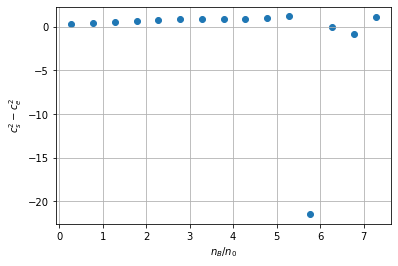

In [237]:
plt.scatter(x ,y)
plt.xlabel('$n_B/n_0$')
plt.grid(True)
plt.ylabel('$c_s^2 - c_e^2$')
plt.show()

In [174]:
sound_speed_diff(550)

21.4635621777177